In [1]:
import os
import numpy as np
import pickle
from IPython.display import Image, display
from random import randint
import imageio

In [2]:
os.chdir(r'C:\Users\susanthanakrishnan\Documents\ISEN 613\Project\batch_bin')
os.getcwd()
filenames = ["batch_bin\\" + x for x in os.listdir('batch_bin') if '.bin' in x]
filenames[0]

'batch_bin\\data_batch_1.bin'

In [3]:
# Read the image files
data = bytes()
for filename in filenames:
    with open(filename, mode='rb') as file:
        data += file.read()

# Read the class names
with open('batch_bin\\' + 'batches.meta.txt', mode='r') as file:
    txt_content = file.read()

class_names = [x for x in txt_content.splitlines() if len(x.strip()) > 0]
print(class_names) 

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [4]:
byt_length = len(data)
assert byt_length == 50000*3073, 'Input files not loaded properly, check folder/file.'

In [5]:
len(data)

153650000

In [6]:
rgb = np.frombuffer(data, dtype=np.uint8)

Lossy conversion from float64 to uint8. Range [6.333333333333333, 252.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [6.333333333333333, 252.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [6.0, 252.0]. Convert image to uint8 prior to saving to suppress this warning.


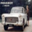

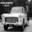

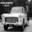

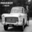

automobile


array([[ 38.        ,  45.66666667,  70.66666667, ..., 202.66666667,
        145.33333333,  82.66666667],
       [ 42.33333333,  48.66666667,  48.        , ..., 140.33333333,
         99.        ,  70.66666667],
       [ 92.        , 148.66666667, 138.66666667, ...,  85.66666667,
         67.33333333,  63.33333333],
       ...,
       [168.33333333, 167.33333333, 162.        , ..., 173.66666667,
        175.33333333, 173.66666667],
       [155.        , 154.66666667, 144.33333333, ..., 172.        ,
        174.33333333, 170.        ],
       [155.        , 152.33333333, 143.33333333, ..., 174.33333333,
        170.        , 162.        ]])

array([[38, 45, 70, ..., 32, 60, 82],
       [42, 48, 48, ..., 55, 13, 70],
       [ 6, 63, 53, ...,  0, 67, 63],
       ...,
       [83, 82, 76, ...,  3,  4,  3],
       [69, 69, 59, ...,  1,  3, 84],
       [69, 67, 58, ...,  3, 84, 76]], dtype=uint8)

array([[ 38.,  45.,  70., ..., 202., 145.,  82.],
       [ 42.,  48.,  48., ..., 140.,  99.,  70.],
       [ 92., 148., 138., ...,  85.,  67.,  63.],
       ...,
       [168., 167., 162., ..., 173., 175., 173.],
       [155., 154., 144., ..., 172., 174., 170.],
       [155., 152., 143., ..., 174., 170., 162.]])

In [191]:
rgb2 = rgb.reshape(50000, 3073)
labels = rgb2[:, 0]
features = rgb2[:, 1:]

# To visualise a random image from the dataset
rgb_3d = features.reshape(50000, 3, 1024)
rand_img_num = randint(0, 49999)
lab = labels[rand_img_num]
img1 = rgb_3d[rand_img_num, :, :]
imgt = img1.transpose().reshape(32, 32, 3)
img_grey = np.mean(imgt, axis=2)
img_grey_u8 = np.mean(imgt, axis=2, dtype=np.uint8)
img_grey_floor = np.floor(np.mean(imgt, axis=2))

imageio.imwrite('test1.png', imgt)
imageio.imwrite('grey_test1.png', img_grey)
imageio.imwrite('grey_test1_u8.png', img_grey)
imageio.imwrite('floor_grey_test1.png', img_grey_floor)

display(Image('test1.png'))
display(Image('grey_test1.png'))
display(Image('grey_test1_u8.png'))
display(Image('floor_grey_test1.png'))

print(class_names[lab])

display(img_grey)
display(img_grey_u8)
display(img_grey_floor)

In [128]:
print(features.shape)
print(labels.shape)

(50000, 3072)
(50000,)


In [95]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
#X, y = load_iris(return_X_y=True)
X = features[:10000]
y = labels[:10000]

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

scaler_test = StandardScaler().fit(X_test)
X_test_scaled = scaler_test.transform(X_test)

import pandas as pd

y_sr = pd.Series(y)
print(np.unique(y, return_counts=True))
print(y_sr.value_counts())

display(X_test.shape)
display(y_test.shape)

C:\Users\susanthanakrishnan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\susanthanakrishnan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\susanthanakrishnan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([1005,  974, 1032, 1016,  999,  937, 1030, 1001, 1025,  981],
      dtype=int64))
2    1032
6    1030
8    1025
3    1016
0    1005
7    1001
4     999
9     981
1     974
5     937
dtype: int64


C:\Users\susanthanakrishnan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(2500, 3072)

(2500,)

In [72]:
import time
t1 = time.time()
clf = LogisticRegressionCV(cv=5, random_state=0,
                            multi_class='auto', solver='saga', n_jobs=7).fit(X_train_scaled, y_train)
t2 = time.time()
print(t2-t1)

C:\Users\susanthanakrishnan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\susanthanakrishnan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\susanthanakrishnan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\susanthanakrishnan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\U

1756.0661118030548


In [85]:
print(clf.predict(X_scaled[:20, :]))
print(y[:20])
print(X[:2, :])
#print(clf.predict_proba(X[:2, :]))

print(clf.score(X_train_scaled, y_train))
print(clf.score(X_test_scaled, y_test))
#pd.Series(y_test).value_counts()

[6 1 9 6 8 7 4 7 0 7 4 0 9 1 9 0 9 5 3 6]
[6 9 9 4 1 1 2 7 8 3 4 7 7 2 9 9 9 3 2 6]
[[ 59  43  50 ... 140  84  72]
 [154 126 105 ... 139 142 144]]
0.46746666666666664
0.4728


In [102]:
import time
t1 = time.time()
clf2 = LogisticRegression(multi_class='auto', solver='liblinear').fit(X_train_scaled[:2000], y_train[:2000])
t2 = time.time()
print(t2-t1)

77.22778820991516


In [107]:
print(clf2.score(X_train_scaled[:2000], y_train[:2000]))
print(clf2.score(X_test_scaled[:2000], y_test[:2000]))

1.0
0.255


In [87]:
X_train_scaled

array([[ 0.06102339,  0.04536943,  0.00639751, ..., -0.44690921,
        -0.49289651, -0.57531812],
       [-1.51857653, -1.14029096, -1.43124468, ..., -1.31702388,
        -1.67639678, -1.71237353],
       [-0.44281451, -0.40959328, -0.43595394, ...,  0.40794029,
         0.41748832,  0.42708599],
       ...,
       [ 1.06869921,  1.14830933,  1.15374656, ...,  1.12540326,
         1.11545002,  1.07041997],
       [ 1.32742678,  1.32753706,  1.31962835, ..., -0.50796989,
        -0.64462731, -0.66508565],
       [-1.66836618, -1.67797416, -1.68006737, ...,  0.94222122,
         0.99406537,  0.71134984]])

In [111]:
rgb_3d[0]

array([[ 59,  43,  50, ..., 216, 151, 123],
       [ 62,  46,  48, ..., 184, 118,  92],
       [ 63,  45,  43, ..., 140,  84,  72]], dtype=uint8)

In [192]:
feat_mean = np.floor(np.mean(rgb_3d, axis=1))

In [193]:
feat_mean.shape

(50000, 1024)

In [194]:
rgb_3d.shape

(50000, 3, 1024)

Lossy conversion from float64 to uint8. Range [11.0, 254.0]. Convert image to uint8 prior to saving to suppress this warning.


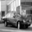

In [236]:
imageio.imwrite('grey.png', feat_mean[randint(0,49999)].reshape(32, 32, 1))
display(Image('grey.png'))

In [315]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
#X, y = load_iris(return_X_y=True)
X = feat_mean
#X = features
y = labels

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

import pandas as pd

y_sr = pd.Series(y)
print(np.unique(y, return_counts=True))
print(y_sr.value_counts())

display(X_test.shape)
display(y_test.shape)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
      dtype=int64))
9    5000
8    5000
7    5000
6    5000
5    5000
4    5000
3    5000
2    5000
1    5000
0    5000
dtype: int64


(12500, 1024)

(12500,)

In [316]:
import time
t1 = time.time()
nx = 10000
x1 = X_train_scaled
y1 = y_train

#x1 = X_train[:nx]
#x1 = features[:nx]
#y1

clf_m = LogisticRegressionCV(cv=5, multi_class='auto', solver='saga', n_jobs=-1).fit(x1, y1)
#clf2 = LogisticRegression(multi_class='auto', solver='saga', n_jobs=7).fit(x1, y1)
#clf3 = LogisticRegressionCV(cv=3, multi_class='auto', solver='saga', n_jobs=7).fit(x1, y1)
#clf4 = LogisticRegressionCV(cv=3, multi_class='auto', solver='saga', n_jobs=7).fit(x1, y1)
t2 = time.time()
print(t2-t1)
# using original & CV=3
print(clf_m.score(x1, y1))
print(clf_m.score(X_test_scaled, y_test))


C:\Users\susanthanakrishnan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\susanthanakrishnan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\susanthanakrishnan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\susanthanakrishnan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\U

1997.4233157634735
0.33368
0.3012


In [317]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
#X, y = load_iris(return_X_y=True)
#X = feat_mean[:10000]
X = features
y = labels

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

import pandas as pd

y_sr = pd.Series(y)
print(np.unique(y, return_counts=True))
print(y_sr.value_counts())

display(X_test.shape)
display(y_test.shape)

import time
t1 = time.time()
nx = 10000
x1 = X_train_scaled
y1 = y_train

#x1 = X_train[:nx]
#x1 = features[:nx]
#y1

clf_o = LogisticRegressionCV(cv=5, multi_class='auto', solver='saga', n_jobs=-1).fit(x1, y1)
#clf2 = LogisticRegression(multi_class='auto', solver='saga', n_jobs=7).fit(x1, y1)
#clf3 = LogisticRegressionCV(cv=3, multi_class='auto', solver='saga', n_jobs=7).fit(x1, y1)
#clf4 = LogisticRegressionCV(cv=3, multi_class='auto', solver='saga', n_jobs=7).fit(x1, y1)
t2 = time.time()
print(t2-t1)
# using original & CV=3
print(clf_o.score(x1, y1))
print(clf_o.score(X_test_scaled, y_test))


C:\Users\susanthanakrishnan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\susanthanakrishnan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
      dtype=int64))
9    5000
8    5000
7    5000
6    5000
5    5000
4    5000
3    5000
2    5000
1    5000
0    5000
dtype: int64


C:\Users\susanthanakrishnan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(12500, 3072)

(12500,)

C:\Users\susanthanakrishnan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\susanthanakrishnan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\susanthanakrishnan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\susanthanakrishnan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\U

7161.087183713913
0.45642666666666665
0.4136


In [291]:
# using mean
print(clf2.score(x1, y1))
print(clf2.score(X_test_scaled, y_test))
print(clf2.score(X_test, y_test))

0.4182666666666667
0.2276
0.2368


In [310]:
# using original
print(clf2.score(x1, y1))
print(clf2.score(X_test_scaled, y_test))
print(clf2.score(X_test, y_test))

0.574
0.5812
0.404


In [304]:
# using mean & CV=3
print(clf3.score(x1, y1))
print(clf3.score(X_test_scaled, y_test))
print(clf3.score(X_test, y_test))

0.36293333333333333
0.288
0.1548


In [312]:
# using original & CV=3
print(clf4.score(x1, y1))
print(clf4.score(X_test_scaled, y_test))
print(clf4.score(X_test, y_test))

0.4922666666666667
0.3972
0.242


In [262]:
X_test_scaled = scaler_test.transform(X_test)

In [296]:
features.shape

(50000, 3072)